In [1]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
def logit(z):
    return 1 / (1 + np.exp(-z))

Saving figure sigmoid_saturation_plot


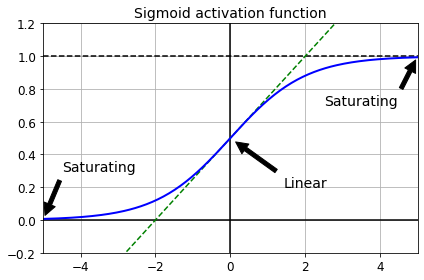

In [3]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("sigmoid_saturation_plot")
plt.show()

In [ ]:
[name for name in dir(keras.initializers) if not name.startswith("_")]


['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [ ]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")


In [ ]:
init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',
                                          distribution='uniform')
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

# Nonsaturating Activation Functions


## *** Leaky ReLU
Need to try but not all

In [ ]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

Saving figure leaky_relu_plot


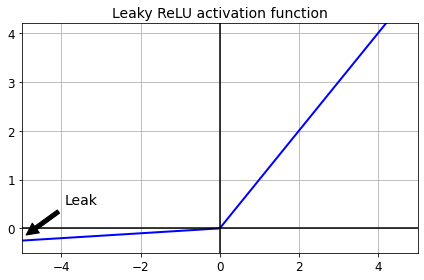

In [ ]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

save_fig("leaky_relu_plot")
plt.show()

In [ ]:
[m for m in dir(keras.activations) if not m.startswith("_")]


['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [ ]:
[m for m in dir(keras.layers) if "relu" in m.lower()]


['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [8]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

4431872/4422102 [==============================] - 0s 0us/step


## *** he_normal + Leaky Relu
should try

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 3ms/step - loss: 1.2819 - accuracy: 0.6229 - val_loss: 0.8886 - val_accuracy: 0.7160
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7955 - accuracy: 0.7362 - val_loss: 0.7130 - val_accuracy: 0.7656
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6816 - accuracy: 0.7721 - val_loss: 0.6427 - val_accuracy: 0.7898
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6217 - accuracy: 0.7944 - val_loss: 0.5900 - val_accuracy: 0.8066
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5832 - accuracy: 0.8075 - val_loss: 0.5582 - val_accuracy: 0.8198
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5553 - accuracy: 0.8156 - val_loss: 0.5350 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5338 - accuracy: 0.8224 - val_loss: 0.5156 - val_accuracy:

## *** he_normal + PRelu
should try

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 4ms/step - loss: 1.3461 - accuracy: 0.6209 - val_loss: 0.9255 - val_accuracy: 0.7186
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.8197 - accuracy: 0.7355 - val_loss: 0.7305 - val_accuracy: 0.7632
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6966 - accuracy: 0.7693 - val_loss: 0.6565 - val_accuracy: 0.7878
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6331 - accuracy: 0.7909 - val_loss: 0.6003 - val_accuracy: 0.8046
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5917 - accuracy: 0.8056 - val_loss: 0.5656 - val_accuracy: 0.8182
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5619 - accuracy: 0.8135 - val_loss: 0.5406 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5390 - accuracy: 0.8205 - val_loss: 0.5196 - val_accuracy:

## ELU


In [ ]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

Saving figure elu_plot


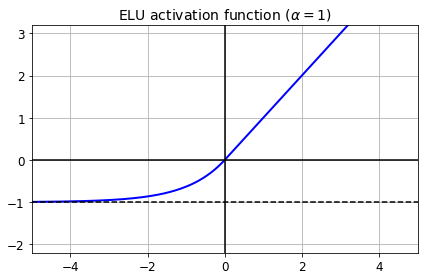

In [ ]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

save_fig("elu_plot")
plt.show()

In [ ]:
keras.layers.Dense(10, activation="elu")


In [ ]:
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [ ]:
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

Saving figure selu_plot


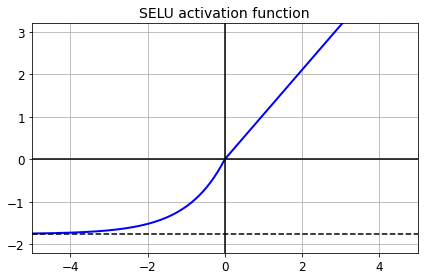

In [ ]:
plt.plot(z, selu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

save_fig("selu_plot")
plt.show()

In [ ]:
np.random.seed(42)
Z = np.random.normal(size=(500, 100)) # standardized inputs
for layer in range(1000):
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100)) # LeCun initialization
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


In [ ]:
keras.layers.Dense(10, activation="selu",
                   kernel_initializer="lecun_normal")

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [10]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 29s 15ms/step - loss: 1.7111 - accuracy: 0.3173 - val_loss: 1.1563 - val_accuracy: 0.5248
Epoch 2/5
1719/1719 [==============================] - 22s 13ms/step - loss: 1.1332 - accuracy: 0.5451 - val_loss: 0.8781 - val_accuracy: 0.6434
Epoch 3/5
1719/1719 [==============================] - 24s 14ms/step - loss: 0.7941 - accuracy: 0.6988 - val_loss: 0.8461 - val_accuracy: 0.6766
Epoch 4/5
1719/1719 [==============================] - 23s 14ms/step - loss: 0.6963 - accuracy: 0.7410 - val_loss: 0.6248 - val_accuracy: 0.7734
Epoch 5/5
1719/1719 [==============================] - 22s 13ms/step - loss: 0.6773 - accuracy: 0.7522 - val_loss: 0.6649 - val_accuracy: 0.7620


In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=5,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 29s 14ms/step - loss: 1.9634 - accuracy: 0.2306 - val_loss: 1.3820 - val_accuracy: 0.4010
Epoch 2/5
1719/1719 [==============================] - 23s 14ms/step - loss: 1.2428 - accuracy: 0.4734 - val_loss: 0.9038 - val_accuracy: 0.6460
Epoch 3/5
1719/1719 [==============================] - 24s 14ms/step - loss: 0.9938 - accuracy: 0.6040 - val_loss: 0.9906 - val_accuracy: 0.5726
Epoch 4/5
1719/1719 [==============================] - 22s 13ms/step - loss: 0.8935 - accuracy: 0.6409 - val_loss: 0.9988 - val_accuracy: 0.5520
Epoch 5/5
1719/1719 [==============================] - 22s 13ms/step - loss: 0.8251 - accuracy: 0.6640 - val_loss: 0.7534 - val_accuracy: 0.7048


## *** Batch Normalization
try to increase acc

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense_212 (Dense)           (None, 300)               235500    
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                                 
                                                                 
 dense_213 (Dense)           (None, 100)               30100     
                                                                 
 batch_normalization_2 (Batc  (None, 100)             

In [ ]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 10s 5ms/step - loss: 0.8750 - accuracy: 0.7123 - val_loss: 0.5525 - val_accuracy: 0.8232
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5753 - accuracy: 0.8030 - val_loss: 0.4725 - val_accuracy: 0.8470
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5189 - accuracy: 0.8205 - val_loss: 0.4376 - val_accuracy: 0.8550
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4827 - accuracy: 0.8324 - val_loss: 0.4153 - val_accuracy: 0.8598
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4565 - accuracy: 0.8407 - val_loss: 0.3997 - val_accuracy: 0.8632
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4398 - accuracy: 0.8474 - val_loss: 0.3867 - val_accuracy: 0.8696
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4242 - accuracy: 0.8513 - val_loss: 0.3762 - val_accuracy

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))


Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 1.0347 - accuracy: 0.6824 - val_loss: 0.6709 - val_accuracy: 0.7908
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.6714 - accuracy: 0.7843 - val_loss: 0.5484 - val_accuracy: 0.8188
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5900 - accuracy: 0.8048 - val_loss: 0.4937 - val_accuracy: 0.8328
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5395 - accuracy: 0.8185 - val_loss: 0.4611 - val_accuracy: 0.8440
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5065 - accuracy: 0.8274 - val_loss: 0.4381 - val_accuracy: 0.8498
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4853 - accuracy: 0.8333 - val_loss: 0.4212 - val_accuracy: 0.8558
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4696 - accuracy: 0.8387 - val_loss: 0.4085 - val_accuracy:

## *** Gradient Clipping
back prop, should try to increase acc

In [ ]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5934 - accuracy: 0.8020 - val_loss: 0.3960 - val_accuracy: 0.8652
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4177 - accuracy: 0.8524 - val_loss: 0.3523 - val_accuracy: 0.8768
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3775 - accuracy: 0.8655 - val_loss: 0.3378 - val_accuracy: 0.8776
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3457 - accuracy: 0.8766 - val_loss: 0.3234 - val_accuracy: 0.8840
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3233 - accuracy: 0.8844 - val_loss: 0.3098 - val_accuracy: 0.8890
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3075 - accuracy: 0.8885 - val_loss: 0.3086 - val_accuracy: 0.8900
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2940 - accuracy: 0.8948 - val_loss: 0.3072 - val_accuracy

In [ ]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.6892 - accuracy: 0.7681 - val_loss: 0.4458 - val_accuracy: 0.8456
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4579 - accuracy: 0.8382 - val_loss: 0.3923 - val_accuracy: 0.8624
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4139 - accuracy: 0.8514 - val_loss: 0.3756 - val_accuracy: 0.8638
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3813 - accuracy: 0.8638 - val_loss: 0.3535 - val_accuracy: 0.8720
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3606 - accuracy: 0.8711 - val_loss: 0.3430 - val_accuracy: 0.8734
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3449 - accuracy: 0.8768 - val_loss: 0.3375 - val_accuracy: 0.8788
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3329 - accuracy: 0.8819 - val_loss: 0.3304 - val_ac

## Reusing Pretrained Layers
try in transfer learning or fine tuning model

In [ ]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [ ]:
X_train_A.shape


(43986, 28, 28)

In [ ]:
X_train_B.shape


(200, 28, 28)

In [ ]:
y_train_A[:30]


array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [ ]:
y_train_B[:30]


array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [ ]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [ ]:
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.5926 - accuracy: 0.8103 - val_loss: 0.3890 - val_accuracy: 0.8677
Epoch 2/20
1375/1375 [==============================] - 5s 3ms/step - loss: 0.3523 - accuracy: 0.8786 - val_loss: 0.3288 - val_accuracy: 0.8822
Epoch 3/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.3170 - accuracy: 0.8896 - val_loss: 0.3013 - val_accuracy: 0.8991
Epoch 4/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2973 - accuracy: 0.8974 - val_loss: 0.2893 - val_accuracy: 0.9021
Epoch 5/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2834 - accuracy: 0.9019 - val_loss: 0.2775 - val_accuracy: 0.9066
Epoch 6/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2729 - accuracy: 0.9062 - val_loss: 0.2733 - val_accuracy: 0.9063
Epoch 7/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2641 - accuracy: 0.9093 - val_loss: 0.2720 - val_accuracy:

In [ ]:
model_A.save("my_model_A.h5")


In [ ]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [ ]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 1s 46ms/step - loss: 0.9573 - accuracy: 0.4650 - val_loss: 0.6314 - val_accuracy: 0.6004
Epoch 2/20
7/7 [==============================] - 0s 18ms/step - loss: 0.5692 - accuracy: 0.7450 - val_loss: 0.4784 - val_accuracy: 0.8529
Epoch 3/20
7/7 [==============================] - 0s 19ms/step - loss: 0.4503 - accuracy: 0.8650 - val_loss: 0.4102 - val_accuracy: 0.8945
Epoch 4/20
7/7 [==============================] - 0s 31ms/step - loss: 0.3879 - accuracy: 0.8950 - val_loss: 0.3647 - val_accuracy: 0.9178
Epoch 5/20
7/7 [==============================] - 0s 47ms/step - loss: 0.3435 - accuracy: 0.9250 - val_loss: 0.3300 - val_accuracy: 0.9320
Epoch 6/20
7/7 [==============================] - 0s 38ms/step - loss: 0.3081 - accuracy: 0.9300 - val_loss: 0.3019 - val_accuracy: 0.9402
Epoch 7/20
7/7 [==============================] - 0s 19ms/step - loss: 0.2800 - accuracy: 0.9350 - val_loss: 0.2804 - val_accuracy: 0.9422
Epoch 8/20
7/7 [===========

In [ ]:
model_B.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_233 (Dense)           (None, 300)               235500    
                                                                 
 dense_234 (Dense)           (None, 100)               30100     
                                                                 
 dense_235 (Dense)           (None, 50)                5050      
                                                                 
 dense_236 (Dense)           (None, 50)                2550      
                                                                 
 dense_237 (Dense)           (None, 50)                2550      
                                                                 
 dense_238 (Dense)           (None, 1)               

In [ ]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())
model_B_on_A = keras.models.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])

In [ ]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                           validation_data=(X_valid_B, y_valid_B))


Epoch 1/4
7/7 [==============================] - 1s 48ms/step - loss: 0.2652 - accuracy: 0.9400 - val_loss: 0.2794 - val_accuracy: 0.9280
Epoch 2/4
7/7 [==============================] - 0s 30ms/step - loss: 0.2555 - accuracy: 0.9400 - val_loss: 0.2698 - val_accuracy: 0.9310
Epoch 3/4
7/7 [==============================] - 0s 31ms/step - loss: 0.2462 - accuracy: 0.9400 - val_loss: 0.2611 - val_accuracy: 0.9341
Epoch 4/4
7/7 [==============================] - 0s 30ms/step - loss: 0.2376 - accuracy: 0.9400 - val_loss: 0.2529 - val_accuracy: 0.9371
Epoch 1/16
7/7 [==============================] - 1s 49ms/step - loss: 0.2126 - accuracy: 0.9450 - val_loss: 0.2047 - val_accuracy: 0.9635
Epoch 2/16
7/7 [==============================] - 0s 31ms/step - loss: 0.1701 - accuracy: 0.9550 - val_loss: 0.1723 - val_accuracy: 0.9716
Epoch 3/16
7/7 [==============================] - 0s 18ms/step - loss: 0.1411 - accuracy: 0.9650 - val_loss: 0.1495 - val_accuracy: 0.9807
Epoch 4/16
7/7 [===============

In [ ]:
model_B.evaluate(X_test_B, y_test_B)


63/63 [==============================] - 0s 4ms/step - loss: 0.1408 - accuracy: 0.9705


[0.1408407837152481, 0.9704999923706055]

In [ ]:
model_B_on_A.evaluate(X_test_B, y_test_B)


63/63 [==============================] - 0s 4ms/step - loss: 0.0563 - accuracy: 0.9940


[0.05628730729222298, 0.9940000176429749]

In [ ]:
(100 - 97.05) / (100 - 99.40)


4.916666666666718

## Faster Optimizers


### Momentum optimization


In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)


### *** Nesterov Accelerated Gradient
*** use momentum =0.9 , nesterov = True, as always

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)


### AdaGrad
*** Not good train DNN

In [ ]:
optimizer = keras.optimizers.Adagrad(learning_rate=0.001)

### RSMProp
*** better set rho = 0.9 as normal

In [ ]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)


### *** Adam Optimization
beta_1=0.9 , beta_=0.999 as normal

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)


### Adamax Optimization


In [ ]:
optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)


### ***Nadam Optimization
*** nesterov + adam

In [ ]:
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)


## Learning Rate Scheduling


### Power Scheduling
lr = lr0 / (1 + steps / s)**c

+ Keras uses c=1 and s = 1 / decay

In [4]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)

In [6]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [11]:

n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))


Epoch 1/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4896 - accuracy: 0.8288 - val_loss: 0.4073 - val_accuracy: 0.8598
Epoch 2/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3835 - accuracy: 0.8644 - val_loss: 0.3787 - val_accuracy: 0.8662
Epoch 3/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3497 - accuracy: 0.8760 - val_loss: 0.3689 - val_accuracy: 0.8700
Epoch 4/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3276 - accuracy: 0.8828 - val_loss: 0.3595 - val_accuracy: 0.8754
Epoch 5/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3111 - accuracy: 0.8898 - val_loss: 0.3568 - val_accuracy: 0.8766
Epoch 6/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2987 - accuracy: 0.8928 - val_loss: 0.3474 - val_accuracy: 0.8806
Epoch 7/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2877 - accuracy: 0.8980 - val_loss: 0.3396 - val_accuracy:

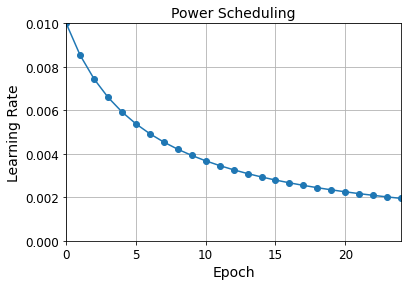

In [12]:
import math

learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

## Exponential Scheduling
lr = lr0 * 0.1**(epoch / s)



In [13]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [14]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [15]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [16]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.8408 - accuracy: 0.7568 - val_loss: 0.7638 - val_accuracy: 0.7780 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7244 - accuracy: 0.7857 - val_loss: 0.6490 - val_accuracy: 0.8140 - lr: 0.0089
Epoch 3/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5973 - accuracy: 0.8164 - val_loss: 0.5466 - val_accuracy: 0.8254 - lr: 0.0079
Epoch 4/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5509 - accuracy: 0.8301 - val_loss: 0.6193 - val_accuracy: 0.7906 - lr: 0.0071
Epoch 5/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5163 - accuracy: 0.8383 - val_loss: 0.5547 - val_accuracy: 0.8200 - lr: 0.0063
Epoch 6/25
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4549 - accuracy: 0.8535 - val_loss: 0.4940 - val_accuracy: 0.8472 - lr: 0.0056
Epoch 7/25
1719/1719 [==============================] - 9s

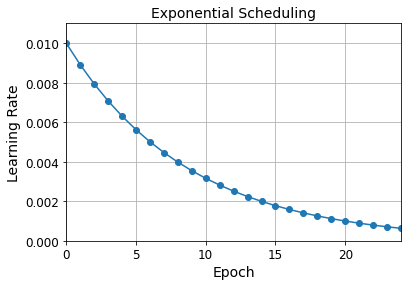

In [17]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

In [18]:
def exponential_decay_fn(epoch, lr):
    return lr * 0.1**(1 / 20)

In [19]:
K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s = s

    def on_batch_begin(self, batch, logs=None):
        # Note: the `batch` argument is reset at each epoch
        lr = K.get_value(self.model.optimizer.learning_rate)
        K.set_value(self.model.optimizer.learning_rate, lr * 0.1**(1 / s))

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.learning_rate)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
lr0 = 0.01
optimizer = keras.optimizers.Nadam(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25

s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
exp_decay = ExponentialDecay(s)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[exp_decay])

Epoch 1/25
1719/1719 [==============================] - 13s 7ms/step - loss: 0.7979 - accuracy: 0.7689 - val_loss: 0.9909 - val_accuracy: 0.7696 - lr: 0.0089
Epoch 2/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6623 - accuracy: 0.7978 - val_loss: 0.6230 - val_accuracy: 0.8090 - lr: 0.0079
Epoch 3/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.6384 - accuracy: 0.8085 - val_loss: 0.7381 - val_accuracy: 0.7490 - lr: 0.0071
Epoch 4/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5234 - accuracy: 0.8358 - val_loss: 0.5200 - val_accuracy: 0.8480 - lr: 0.0063
Epoch 5/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4727 - accuracy: 0.8517 - val_loss: 0.5452 - val_accuracy: 0.8262 - lr: 0.0056
Epoch 6/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4286 - accuracy: 0.8603 - val_loss: 0.4699 - val_accuracy: 0.8608 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================]

In [20]:
n_steps = n_epochs * len(X_train) // 32
steps = np.arange(n_steps)
lrs = lr0 * 0.1**(steps / s)

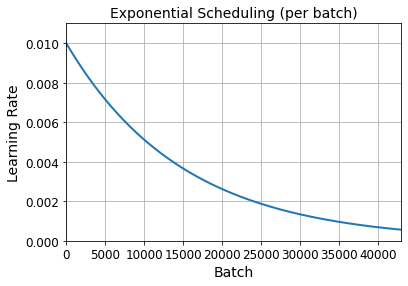

In [21]:
plt.plot(steps, lrs, "-", linewidth=2)
plt.axis([0, n_steps - 1, 0, lr0 * 1.1])
plt.xlabel("Batch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling (per batch)", fontsize=14)
plt.grid(True)
plt.show()

### Piecewise Constant Scheduling


In [22]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [23]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [24]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.8872 - accuracy: 0.7459 - val_loss: 1.7315 - val_accuracy: 0.6638 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.8360 - accuracy: 0.7457 - val_loss: 0.8056 - val_accuracy: 0.7408 - lr: 0.0100
Epoch 3/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.9464 - accuracy: 0.7244 - val_loss: 1.2252 - val_accuracy: 0.6666 - lr: 0.0100
Epoch 4/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.9363 - accuracy: 0.7143 - val_loss: 0.8770 - val_accuracy: 0.7326 - lr: 0.0100
Epoch 5/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.9521 - accuracy: 0.7047 - val_loss: 0.8902 - val_accuracy: 0.6590 - lr: 0.0100
Epoch 6/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6488 - accuracy: 0.7733 - val_loss: 0.6390 - val_accuracy: 0.7332 - lr: 0.0050
Epoch 7/25
1719/1719 [==============================] - 8s

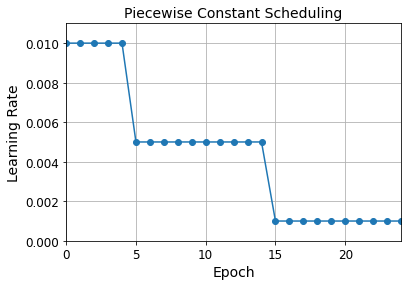

In [25]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

### Performance Scheduling


In [26]:
tf.random.set_seed(42)
np.random.seed(42)

In [27]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5872 - accuracy: 0.8078 - val_loss: 0.4630 - val_accuracy: 0.8546 - lr: 0.0200
Epoch 2/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4996 - accuracy: 0.8391 - val_loss: 0.6037 - val_accuracy: 0.8296 - lr: 0.0200
Epoch 3/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5323 - accuracy: 0.8384 - val_loss: 0.5186 - val_accuracy: 0.8532 - lr: 0.0200
Epoch 4/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5125 - accuracy: 0.8464 - val_loss: 0.5296 - val_accuracy: 0.8446 - lr: 0.0200
Epoch 5/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5470 - accuracy: 0.8454 - val_loss: 0.4961 - val_accuracy: 0.8464 - lr: 0.0200
Epoch 6/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5061 - accuracy: 0.8539 - val_loss: 0.5420 - val_accuracy: 0.8450 - lr: 0.0200
Epoch 7/25
1719/1719 [==============================] - 6s

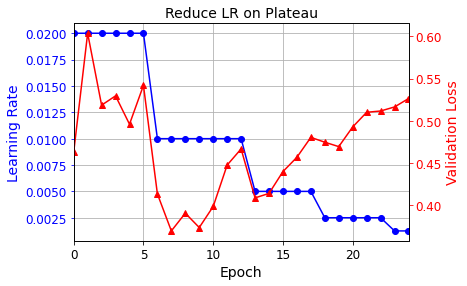

In [28]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

### tf.keras schedulers


In [29]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size = 32)
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4894 - accuracy: 0.8274 - val_loss: 0.4092 - val_accuracy: 0.8604
Epoch 2/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3820 - accuracy: 0.8651 - val_loss: 0.3739 - val_accuracy: 0.8694
Epoch 3/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3487 - accuracy: 0.8766 - val_loss: 0.3731 - val_accuracy: 0.8684
Epoch 4/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3264 - accuracy: 0.8836 - val_loss: 0.3492 - val_accuracy: 0.8802
Epoch 5/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3104 - accuracy: 0.8897 - val_loss: 0.3432 - val_accuracy: 0.8794
Epoch 6/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2958 - accuracy: 0.8953 - val_loss: 0.3416 - val_accuracy: 0.8812
Epoch 7/25
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2854 - accuracy: 0.8987 - val_loss: 0.3356 - val_accuracy:

In [30]:
learning_rate = keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[5. * n_steps_per_epoch, 15. * n_steps_per_epoch],
    values=[0.01, 0.005, 0.001])


### 1Cycle scheduling


In [31]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.learning_rate)
    K.set_value(model.optimizer.learning_rate, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.learning_rate, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [32]:
class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_epoch_begin(self, epoch, logs=None):
        self.prev_loss = 0
    def on_batch_end(self, batch, logs=None):
        batch_loss = logs["loss"] * (batch + 1) - self.prev_loss * batch
        self.prev_loss = logs["loss"]
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(batch_loss)
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [33]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

430/430 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.3875


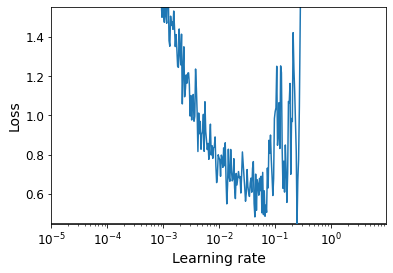

In [34]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [35]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, rate)


In [36]:
n_epochs = 25
onecycle = OneCycleScheduler(math.ceil(len(X_train) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Epoch 1/25
430/430 [==============================] - 2s 4ms/step - loss: 0.6572 - accuracy: 0.7740 - val_loss: 0.4872 - val_accuracy: 0.8336
Epoch 2/25
430/430 [==============================] - 2s 4ms/step - loss: 0.4581 - accuracy: 0.8397 - val_loss: 0.4274 - val_accuracy: 0.8524
Epoch 3/25
430/430 [==============================] - 2s 4ms/step - loss: 0.4122 - accuracy: 0.8549 - val_loss: 0.4114 - val_accuracy: 0.8586
Epoch 4/25
430/430 [==============================] - 2s 4ms/step - loss: 0.3837 - accuracy: 0.8641 - val_loss: 0.3870 - val_accuracy: 0.8690
Epoch 5/25
430/430 [==============================] - 2s 4ms/step - loss: 0.3640 - accuracy: 0.8716 - val_loss: 0.3767 - val_accuracy: 0.8678
Epoch 6/25
430/430 [==============================] - 2s 4ms/step - loss: 0.3457 - accuracy: 0.8773 - val_loss: 0.3743 - val_accuracy: 0.8706
Epoch 7/25
430/430 [==============================] - 2s 4ms/step - loss: 0.3330 - accuracy: 0.8810 - val_loss: 0.3630 - val_accuracy: 0.8712
Epoch 

## ***Avoiding Overfitting Through Regularization
use for overfitting

### l1 and l2 regularization

In [37]:
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

In [38]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 9s 5ms/step - loss: 1.5956 - accuracy: 0.8124 - val_loss: 0.7169 - val_accuracy: 0.8340
Epoch 2/2
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7197 - accuracy: 0.8274 - val_loss: 0.6850 - val_accuracy: 0.8376


In [39]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 9s 5ms/step - loss: 1.6313 - accuracy: 0.8113 - val_loss: 0.7218 - val_accuracy: 0.8310
Epoch 2/2
1719/1719 [==============================] - 8s 5ms/step - loss: 0.7187 - accuracy: 0.8273 - val_loss: 0.6826 - val_accuracy: 0.8382


In [40]:
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))


Epoch 1/2
1719/1719 [==============================] - 9s 5ms/step - loss: 1.6630 - accuracy: 0.8122 - val_loss: 0.7201 - val_accuracy: 0.8308
Epoch 2/2
1719/1719 [==============================] - 8s 5ms/step - loss: 0.7188 - accuracy: 0.8266 - val_loss: 0.6806 - val_accuracy: 0.8402


### Dropout


In [41]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))


Epoch 1/2
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5708 - accuracy: 0.8029 - val_loss: 0.3612 - val_accuracy: 0.8726
Epoch 2/2
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4179 - accuracy: 0.8464 - val_loss: 0.3500 - val_accuracy: 0.8708


### Alpha Dropout
for selu and self normalize network

In [42]:
tf.random.set_seed(42)
np.random.seed(42)

In [43]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6617 - accuracy: 0.7611 - val_loss: 0.5756 - val_accuracy: 0.8410
Epoch 2/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5547 - accuracy: 0.7968 - val_loss: 0.5406 - val_accuracy: 0.8478
Epoch 3/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5256 - accuracy: 0.8059 - val_loss: 0.5014 - val_accuracy: 0.8560
Epoch 4/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5050 - accuracy: 0.8123 - val_loss: 0.4736 - val_accuracy: 0.8616
Epoch 5/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4923 - accuracy: 0.8170 - val_loss: 0.4648 - val_accuracy: 0.8598
Epoch 6/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4836 - accuracy: 0.8203 - val_loss: 0.4806 - val_accuracy: 0.8578
Epoch 7/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4718 - accuracy: 0.8248 - val_loss: 0.5089 - val_accuracy:

In [44]:
model.evaluate(X_test_scaled, y_test)


313/313 [==============================] - 1s 3ms/step - loss: 0.4557 - accuracy: 0.8630


[0.4556819200515747, 0.8629999756813049]

In [45]:
model.evaluate(X_train_scaled, y_train)


1719/1719 [==============================] - 5s 3ms/step - loss: 0.3305 - accuracy: 0.8855


[0.3304947316646576, 0.8855454325675964]

In [46]:
history = model.fit(X_train_scaled, y_train)


1719/1719 [==============================] - 6s 3ms/step - loss: 0.4187 - accuracy: 0.8444


## MC Dropout
use case: su dung khi can xac dinh do chac chan khi model dung dropout

In [47]:
tf.random.set_seed(42)
np.random.seed(42)

In [48]:
y_probas = np.stack([model(X_test_scaled, training=True)
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)

In [49]:
y_probas = np.stack([model(X_test_scaled, training=True)
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)

In [50]:
np.round(model.predict(X_test_scaled[:1]), 2)


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99]],
      dtype=float32)

In [51]:
np.round(y_probas[:, :1], 2)


array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.18, 0.  , 0.43, 0.  , 0.39]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.09, 0.  , 0.74, 0.  , 0.17]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.27, 0.  , 0.72]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.14, 0.  , 0.84]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.31, 0.  , 0.63]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.83, 0.  , 0.04, 0.  , 0.13]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.15, 0.  , 0.64, 0.  , 0.21]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.9 , 0.  , 0.08]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.64, 0.  , 0.3 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.12, 0.  , 0.23, 0.  , 0.65]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.08, 0.  , 0.85]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.09, 0.  , 0.87]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.59, 0.  , 0.25, 0.  , 0.16]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.31, 0.  , 0

In [52]:
np.round(y_proba[:1], 2)


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.13, 0.  , 0.24, 0.  , 0.63]],
      dtype=float32)

In [53]:
y_std = y_probas.std(axis=0)
np.round(y_std[:1], 2)


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.2 , 0.  , 0.21, 0.  , 0.27]],
      dtype=float32)

In [54]:
y_pred = np.argmax(y_proba, axis=1)


In [55]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.8714

In [56]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [57]:
tf.random.set_seed(42)
np.random.seed(42)

In [58]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [59]:
mc_model.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 mc_alpha_dropout (MCAlphaDr  (None, 784)              0         
 opout)                                                          
                                                                 
 dense_34 (Dense)            (None, 300)               235500    
                                                                 
 mc_alpha_dropout_1 (MCAlpha  (None, 300)              0         
 Dropout)                                                        
                                                                 
 dense_35 (Dense)            (None, 100)               30100     
                                                                 
 mc_alpha_dropout_2 (MCAlpha  (None, 100)            

In [60]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [61]:
mc_model.set_weights(model.get_weights())


In [62]:
np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.11, 0.  , 0.27, 0.  , 0.61]],
      dtype=float32)

## Max norm
try for overfitting

In [63]:
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

In [64]:
MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4745 - accuracy: 0.8329 - val_loss: 0.3754 - val_accuracy: 0.8606
Epoch 2/2
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3555 - accuracy: 0.8707 - val_loss: 0.3776 - val_accuracy: 0.8650


## Exercises

### Q8: Deep Learning on CIFAR10

Exercise: Build a DNN with 20 hidden layers of 100 neurons each (that's too many, but it's the point of this exercise). Use He initialization and the ELU activation function.



In [65]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 activation="elu",
                                 kernel_initializer="he_normal"))

b.
Exercise: Using Nadam optimization and early stopping, train the network on the CIFAR10 dataset. You can load it with keras.datasets.cifar10.load_data(). The dataset is composed of 60,000 32 × 32–pixel color images (50,000 for training, 10,000 for testing) with 10 classes, so you'll need a softmax output layer with 10 neurons. Remember to search for the right learning rate each time you change the model's architecture or hyperparameters.

Let's add the output layer to the model:

In [66]:
model.add(keras.layers.Dense(10, activation="softmax"))


In [67]:
optimizer = keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [68]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

170508288/170498071 [==============================] - 6s 0us/step


In [69]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_model.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [70]:
model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - 23s 13ms/step - loss: 4.1806 - accuracy: 0.1608 - val_loss: 2.1614 - val_accuracy: 0.2166
Epoch 2/100
1407/1407 [==============================] - 19s 14ms/step - loss: 2.0833 - accuracy: 0.2409 - val_loss: 2.1316 - val_accuracy: 0.2294
Epoch 3/100
1407/1407 [==============================] - 18s 13ms/step - loss: 1.9446 - accuracy: 0.2858 - val_loss: 2.1239 - val_accuracy: 0.2426
Epoch 4/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.8559 - accuracy: 0.3212 - val_loss: 1.8858 - val_accuracy: 0.3144
Epoch 5/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.7949 - accuracy: 0.3470 - val_loss: 1.8064 - val_accuracy: 0.3338
Epoch 6/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.7423 - accuracy: 0.3694 - val_loss: 1.7483 - val_accuracy: 0.3618
Epoch 7/100
1407/1407 [==============================] - 18s 13ms/step - loss: 1.7002 - accuracy: 0.3859 - val_loss: 1

In [71]:

model = keras.models.load_model("my_cifar10_model.h5")
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 1s 4ms/step - loss: 1.5189 - accuracy: 0.4574


[1.5188556909561157, 0.45739999413490295]

Exercise: Now try adding Batch Normalization and compare the learning curves: Is it converging faster than before? Does it produce a better model? How does it affect training speed?

The code below is very similar to the code above, with a few changes:

I added a BN layer after every Dense layer (before the activation function), except for the output layer. I also added a BN layer before the first hidden layer.
I changed the learning rate to 5e-4. I experimented with 1e-5, 3e-5, 5e-5, 1e-4, 3e-4, 5e-4, 1e-3 and 3e-3, and I chose the one with the best validation performance after 20 epochs.
I renamed the run directories to runbn* and the model file name to my_cifar10_bn_model.h5.

In [72]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.BatchNormalization())
for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_initializer="he_normal"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation("elu"))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_bn_model.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_bn_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_bn_model.h5")
model.evaluate(X_valid, y_valid)

Epoch 1/100
1407/1407 [==============================] - 61s 36ms/step - loss: 1.8425 - accuracy: 0.3395 - val_loss: 1.6721 - val_accuracy: 0.4078
Epoch 2/100
1407/1407 [==============================] - 50s 36ms/step - loss: 1.6712 - accuracy: 0.4025 - val_loss: 1.5720 - val_accuracy: 0.4352
Epoch 3/100
1407/1407 [==============================] - 48s 34ms/step - loss: 1.5979 - accuracy: 0.4318 - val_loss: 1.5345 - val_accuracy: 0.4482
Epoch 4/100
1407/1407 [==============================] - 49s 35ms/step - loss: 1.5467 - accuracy: 0.4484 - val_loss: 1.4814 - val_accuracy: 0.4720
Epoch 5/100
1407/1407 [==============================] - 49s 35ms/step - loss: 1.5025 - accuracy: 0.4669 - val_loss: 1.4358 - val_accuracy: 0.4880
Epoch 6/100
1407/1407 [==============================] - 48s 34ms/step - loss: 1.4639 - accuracy: 0.4790 - val_loss: 1.4410 - val_accuracy: 0.4816
Epoch 7/100
1407/1407 [==============================] - 49s 35ms/step - loss: 1.4328 - accuracy: 0.4916 - val_loss: 1

[1.320580244064331, 0.5437999963760376]

Exercise: Try replacing Batch Normalization with SELU, and make the necessary adjustements to ensure the network self-normalizes (i.e., standardize the input features, use LeCun normal initialization, make sure the DNN contains only a sequence of dense layers, etc.).

In [73]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(learning_rate=7e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_selu_model.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_selu_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_selu_model.h5")
model.evaluate(X_valid_scaled, y_valid)

Epoch 1/100
1407/1407 [==============================] - 22s 13ms/step - loss: 1.9415 - accuracy: 0.3041 - val_loss: 1.8389 - val_accuracy: 0.3416
Epoch 2/100
1407/1407 [==============================] - 18s 13ms/step - loss: 1.7212 - accuracy: 0.3912 - val_loss: 1.7169 - val_accuracy: 0.3808
Epoch 3/100
1407/1407 [==============================] - 18s 13ms/step - loss: 1.6212 - accuracy: 0.4279 - val_loss: 1.6378 - val_accuracy: 0.4088
Epoch 4/100
1407/1407 [==============================] - 18s 13ms/step - loss: 1.5573 - accuracy: 0.4521 - val_loss: 1.6094 - val_accuracy: 0.4404
Epoch 5/100
1407/1407 [==============================] - 18s 13ms/step - loss: 1.4981 - accuracy: 0.4744 - val_loss: 1.5944 - val_accuracy: 0.4352
Epoch 6/100
1407/1407 [==============================] - 18s 13ms/step - loss: 1.4511 - accuracy: 0.4917 - val_loss: 1.5365 - val_accuracy: 0.4642
Epoch 7/100
1407/1407 [==============================] - 18s 13ms/step - loss: 1.4097 - accuracy: 0.5076 - val_loss: 1

[1.475364327430725, 0.49000000953674316]

In [74]:
model = keras.models.load_model("my_cifar10_selu_model.h5")
model.evaluate(X_valid_scaled, y_valid)

157/157 [==============================] - 1s 4ms/step - loss: 1.4754 - accuracy: 0.4900


[1.475364327430725, 0.49000000953674316]

Exercise: Try regularizing the model with alpha dropout. Then, without retraining your model, see if you can achieve better accuracy using MC Dropout.



In [75]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_alpha_dropout_model.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_alpha_dropout_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_alpha_dropout_model.h5")
model.evaluate(X_valid_scaled, y_valid)

Epoch 1/100
1407/1407 [==============================] - 22s 13ms/step - loss: 1.8903 - accuracy: 0.3285 - val_loss: 1.7161 - val_accuracy: 0.4006
Epoch 2/100
1407/1407 [==============================] - 18s 13ms/step - loss: 1.6586 - accuracy: 0.4164 - val_loss: 1.6418 - val_accuracy: 0.4172
Epoch 3/100
1407/1407 [==============================] - 18s 13ms/step - loss: 1.5629 - accuracy: 0.4505 - val_loss: 1.6259 - val_accuracy: 0.4260
Epoch 4/100
1407/1407 [==============================] - 18s 13ms/step - loss: 1.5015 - accuracy: 0.4714 - val_loss: 1.5556 - val_accuracy: 0.4672
Epoch 5/100
1407/1407 [==============================] - 18s 13ms/step - loss: 1.4426 - accuracy: 0.4968 - val_loss: 1.5934 - val_accuracy: 0.4624
Epoch 6/100
1407/1407 [==============================] - 18s 13ms/step - loss: 1.3932 - accuracy: 0.5132 - val_loss: 1.5402 - val_accuracy: 0.4698
Epoch 7/100
1407/1407 [==============================] - 18s 13ms/step - loss: 1.3517 - accuracy: 0.5258 - val_loss: 1

[1.505560040473938, 0.48500001430511475]

Let's use MC Dropout now. We will need the MCAlphaDropout class we used earlier, so let's just copy it here for convenience:



In [76]:
class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [77]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [78]:
def mc_dropout_predict_probas(mc_model, X, n_samples=10):
    Y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis=0)

def mc_dropout_predict_classes(mc_model, X, n_samples=10):
    Y_probas = mc_dropout_predict_probas(mc_model, X, n_samples)
    return np.argmax(Y_probas, axis=1)

In [79]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

y_pred = mc_dropout_predict_classes(mc_model, X_valid_scaled)
accuracy = np.mean(y_pred == y_valid[:, 0])
accuracy

0.4872

Exercise: Retrain your model using 1cycle scheduling and see if it improves training speed and model accuracy.



352/352 [==============================] - 3s 7ms/step - loss: nan - accuracy: 0.1394


(9.999999747378752e-06,
 9.615227699279785,
 2.0597217082977295,
 3.608081681387765)

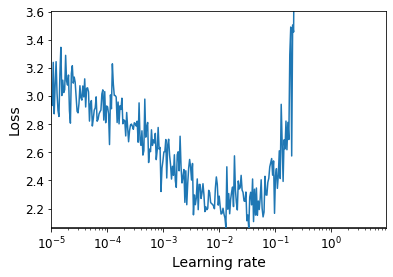

In [80]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)
plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 1.4])

In [81]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.SGD(learning_rate=1e-2)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

## *** Find learning rate

352/352 [==============================] - 3s 7ms/step - loss: nan - accuracy: 0.1378


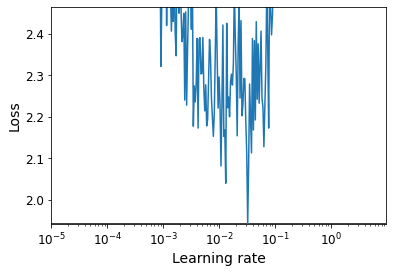

In [82]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [83]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.SGD(learning_rate=1e-2)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])
n_epochs = 15
onecycle = OneCycleScheduler(math.ceil(len(X_train_scaled) / batch_size) * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Epoch 1/15
352/352 [==============================] - 4s 8ms/step - loss: 2.0549 - accuracy: 0.2866 - val_loss: 1.7835 - val_accuracy: 0.3834
Epoch 2/15
352/352 [==============================] - 3s 7ms/step - loss: 1.7623 - accuracy: 0.3775 - val_loss: 1.6481 - val_accuracy: 0.4236
Epoch 3/15
352/352 [==============================] - 2s 7ms/step - loss: 1.6181 - accuracy: 0.4251 - val_loss: 1.6200 - val_accuracy: 0.4348
Epoch 4/15
352/352 [==============================] - 2s 7ms/step - loss: 1.5432 - accuracy: 0.4540 - val_loss: 1.6379 - val_accuracy: 0.4298
Epoch 5/15
352/352 [==============================] - 2s 7ms/step - loss: 1.4894 - accuracy: 0.4729 - val_loss: 1.5818 - val_accuracy: 0.4526
Epoch 6/15
352/352 [==============================] - 2s 7ms/step - loss: 1.4500 - accuracy: 0.4865 - val_loss: 1.5844 - val_accuracy: 0.4432
Epoch 7/15
352/352 [==============================] - 2s 7ms/step - loss: 1.4097 - accuracy: 0.5005 - val_loss: 1.5658 - val_accuracy: 0.4566
Epoch 